### DS2500 Group Project Code

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.dates as mdates
import numpy as np
import statistics
from sklearn.linear_model import LinearRegression

LA_UNEMPLOYEEMENT_RATE = "SeriesReport-20240810155710_9ce1e7.xlsx"
la_crime_data = 'Crime_Data_from_2020_to_Present_20240810 2.csv'
file_path_boston = 'SeriesReport-20240815201417_080cd2.csv'

/Users/wentaohuang/anaconda3/lib/python3.11/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/var/folders/4l/hcgsry_10cbdgqk9bn__ct5h0000gn/T/ipykernel_42769/3861955223.py:24: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  date_index_la = pd.to_datetime(x_time_la)


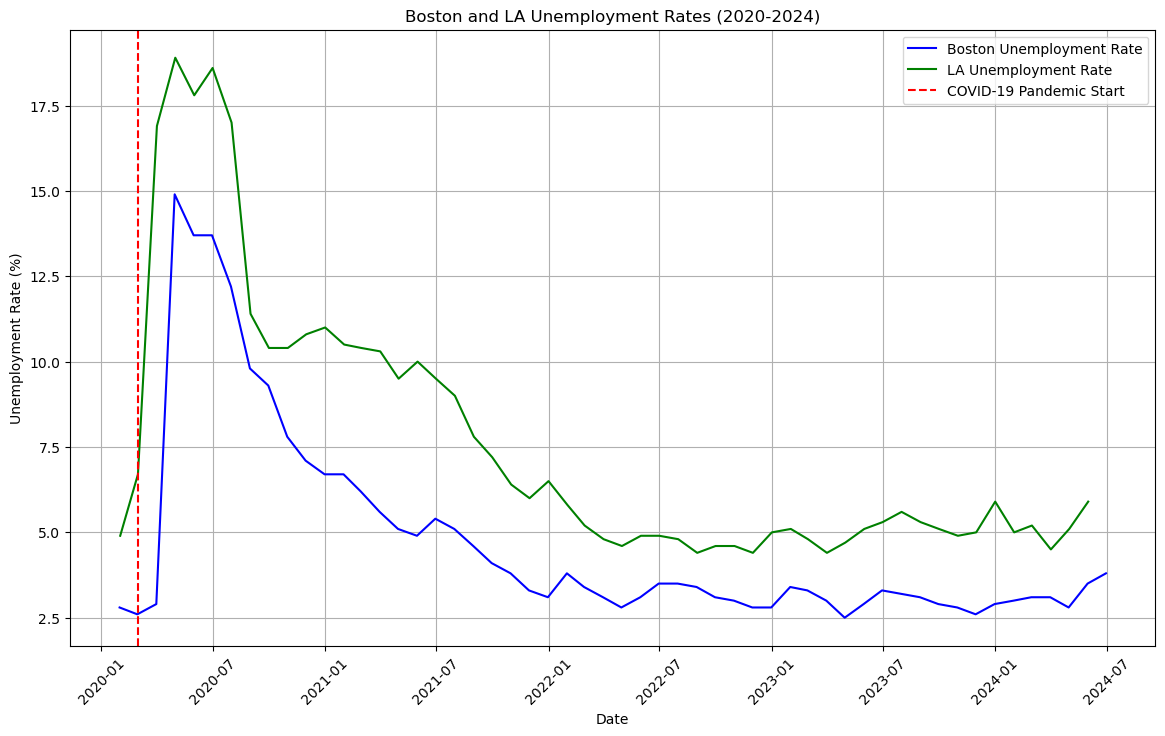

In [42]:
# LA Unemployment Data
df_la_un = pd.read_excel(LA_UNEMPLOYEEMENT_RATE)

# Boston unemployment data
data_boston = pd.read_csv(file_path_boston, skiprows=5)
data_cleaned_boston = data_boston.dropna(axis=1, how='all')

#clean boston unemployment data and prepare plot data
years_boston = data_cleaned_boston.iloc[5:, 0].astype(int)
monthly_data_boston = data_cleaned_boston.iloc[5:, 1:13].apply(pd.to_numeric)
date_index_boston = pd.date_range(start=f'{years_boston.min()}-01', end=f'{years_boston.max()}-12', freq='M')
unemployment_numbers_boston = monthly_data_boston.values.flatten()
unemployment_numbers_boston = unemployment_numbers_boston[:len(date_index_boston)]

# clean LA Unemployment Data
df_la_un.loc[2].replace('\n', ' ', regex=True, inplace=True)
df_la_un.drop("Local Area Unemployment Statistics", axis=1, inplace=True)
df_la_un.drop(index=[0, 1], inplace=True)
df_la_un.dropna(how='any', inplace=True, axis=1)

# Prepare LA plot data 
x_time_la = list(df_la_un.loc[2][1:])
y_un_la = list(df_la_un.loc[3][1:])
date_index_la = pd.to_datetime(x_time_la)

# Plotting Unemployment Rates
plt.figure(figsize=(14, 8))
plt.plot(date_index_boston, unemployment_numbers_boston, linestyle='-', color='blue', label='Boston Unemployment Rate')
plt.plot(date_index_la, y_un_la, linestyle='-', color='green', label='LA Unemployment Rate')
plt.axvline(pd.to_datetime("2020-03-01"), color='red', linestyle='--', label='COVID-19 Pandemic Start')
plt.title("Boston and LA Unemployment Rates (2020-2024)")
plt.xlabel("Date")
plt.ylabel("Unemployment Rate (%)")
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.show()


/var/folders/4l/hcgsry_10cbdgqk9bn__ct5h0000gn/T/ipykernel_42769/3444755705.py:3: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df20_boston = pd.read_csv('tmpkd_w64k_.csv')
/var/folders/4l/hcgsry_10cbdgqk9bn__ct5h0000gn/T/ipykernel_42769/3444755705.py:4: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df21_boston = pd.read_csv('tmpfap3hfze.csv')
/var/folders/4l/hcgsry_10cbdgqk9bn__ct5h0000gn/T/ipykernel_42769/3444755705.py:5: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df22_boston = pd.read_csv('tmpdfeo3qy2.csv')
/var/folders/4l/hcgsry_10cbdgqk9bn__ct5h0000gn/T/ipykernel_42769/3444755705.py:6: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df_boston = pd.read_csv('tmplnosy45y.csv')
/var/folders/4l/hcgsry_10cbdgqk9bn__ct5h0000gn/T/ipykernel_42769/3444755705.py:15: Use

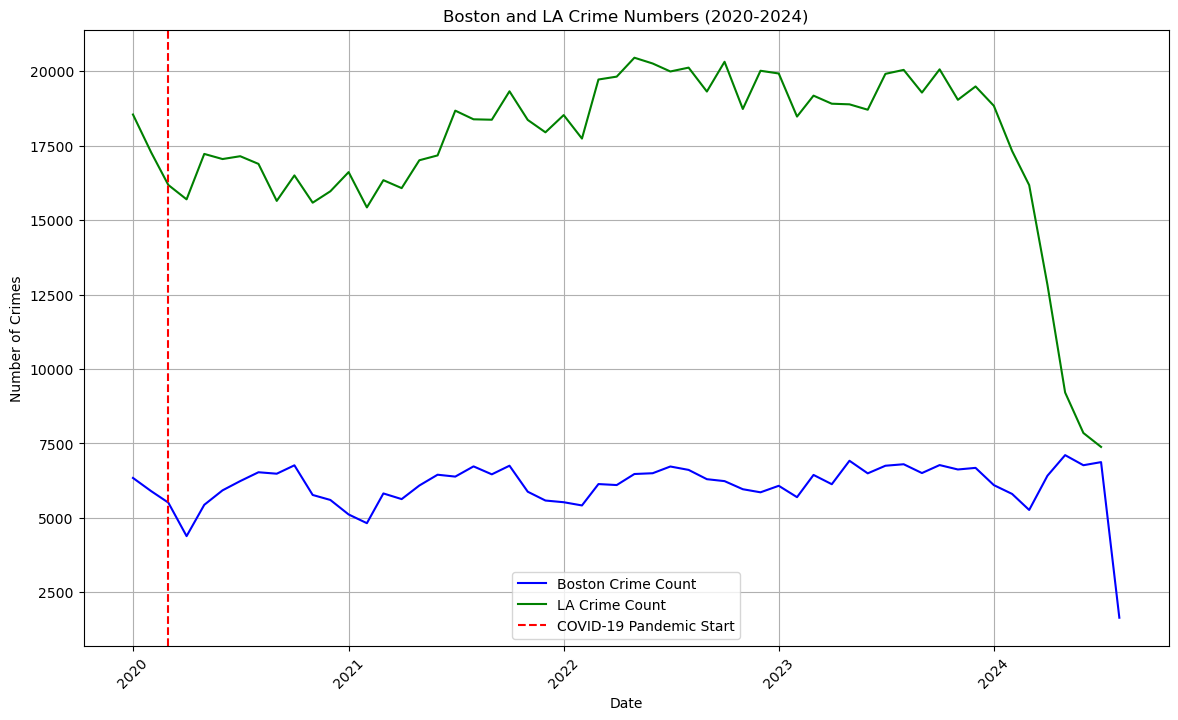

In [43]:
df_la_crime = pd.read_csv(la_crime_data)
# Load and combine Boston crime data
df20_boston = pd.read_csv('tmpkd_w64k_.csv')
df21_boston = pd.read_csv('tmpfap3hfze.csv')
df22_boston = pd.read_csv('tmpdfeo3qy2.csv')
df_boston = pd.read_csv('tmplnosy45y.csv')

df_combined_boston = pd.concat([df20_boston, df21_boston, df22_boston, df_boston])

# Calculate monthly crime counts for Boston
monthly_crime_counts_boston = df_combined_boston.groupby(['YEAR', 'MONTH']).size().reset_index(name='Crime Count')
monthly_crime_counts_boston['Date'] = pd.to_datetime(monthly_crime_counts_boston['YEAR'].astype(str) + '-' + monthly_crime_counts_boston['MONTH'].astype(str))

# Load and combine LA crime data
df_la_crime['DATE OCC'] = pd.to_datetime(df_la_crime['DATE OCC'])
df_la_crime['YearMonth'] = df_la_crime['DATE OCC'].dt.to_period('M')
monthly_crime_la = df_la_crime.groupby('YearMonth').size()
monthly_crime_la = monthly_crime_la[:-1]
monthly_crime_counts_la = monthly_crime_la.to_timestamp()

# Plotting Crime Numbers
plt.figure(figsize=(14, 8))
plt.plot(monthly_crime_counts_boston['Date'], monthly_crime_counts_boston['Crime Count'], color='blue', linestyle='-', label='Boston Crime Count')
plt.plot(monthly_crime_counts_la.index, monthly_crime_counts_la.values, color='green', linestyle='-', label='LA Crime Count')
plt.axvline(pd.Timestamp('2020-03-01'), color='red', linestyle='--', label='COVID-19 Pandemic Start')
plt.title("Boston and LA Crime Numbers (2020-2024)")
plt.xlabel("Date")
plt.ylabel("Number of Crimes")
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.show()


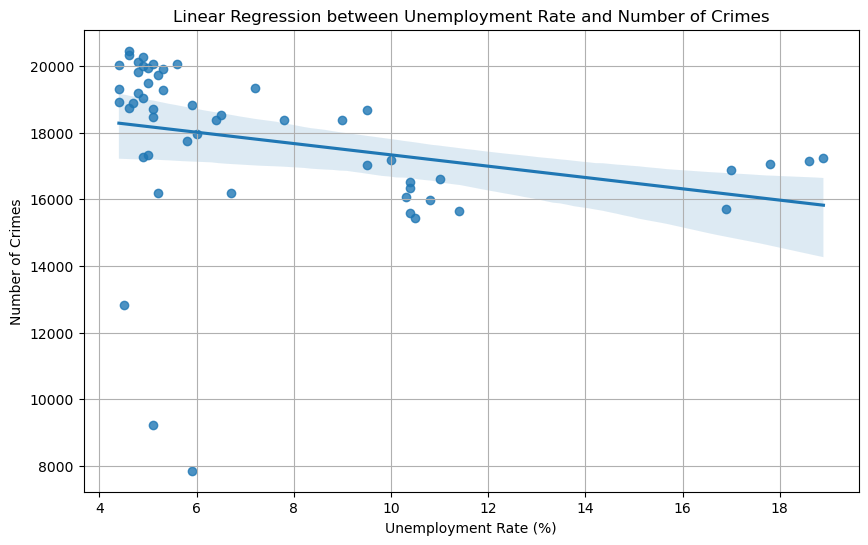

-0.2739

In [44]:
#prepare the data for regression
x_time = np.array(y_un_la)
y_crime = np.array(monthly_crime_la[1:-1])

# Plot the data and the regression line
plt.figure(figsize=(10, 6))
sns.regplot(x=x_time, y=y_crime)
plt.title('Linear Regression between Unemployment Rate and Number of Crimes')
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('Number of Crimes')
plt.grid(True)
plt.show()

corr = round(statistics.correlation(x_time,y_crime), 4)
corr

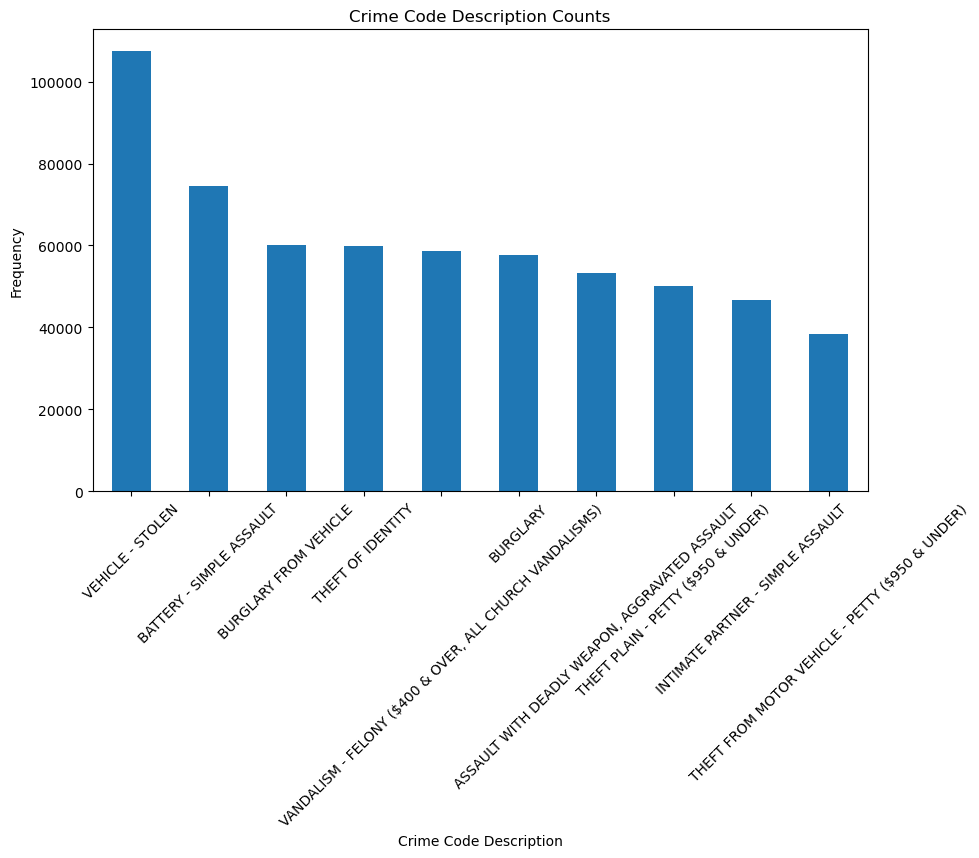

In [45]:
# Count the occurrences of each unique value in the 'Crm Cd Desc' column
crm_cd_desc_counts = df_la_crime['Crm Cd Desc'].value_counts()[:10]
crm_cd_desc_counts

#Plotting the bar chart
plt.figure(figsize=(10, 6))
crm_cd_desc_counts.plot(kind='bar')
plt.title('Crime Code Description Counts')
plt.xlabel('Crime Code Description')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.savefig("la crime code description.png")
plt.show()

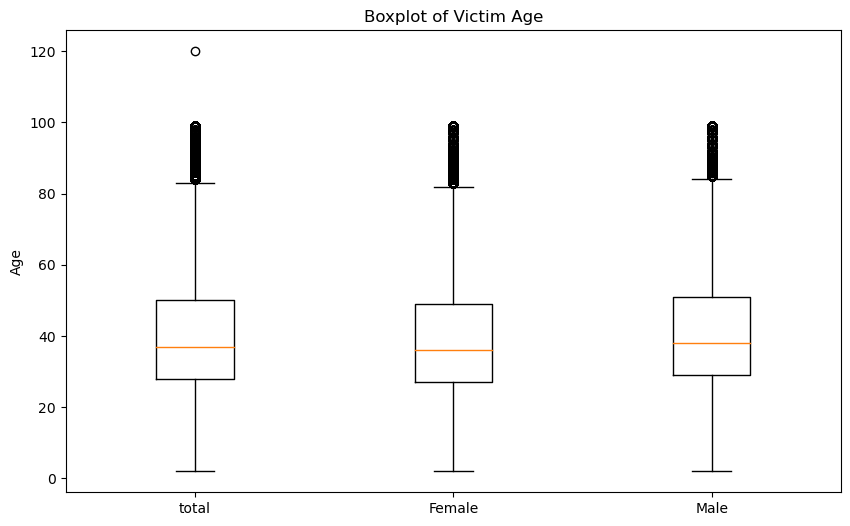

In [46]:
# Drop the rows where 'Vict Age' is 0
df_filtered = df_la_crime[df_la_crime['Vict Age'] > 0]
female_ages = df_filtered[df_filtered['Vict Sex'] == 'F']['Vict Age'].dropna()
male_ages = df_filtered[df_filtered['Vict Sex'] == 'M']['Vict Age'].dropna()
total_ages = df_filtered['Vict Age'].dropna()

# Create the boxplot
plt.figure(figsize=(10, 6))
plt.boxplot([total_ages,female_ages, male_ages], labels=['total','Female', 'Male'])
plt.title('Boxplot of Victim Age')
plt.ylabel('Age')
plt.savefig("la boxplot of victim age.png")
plt.show()

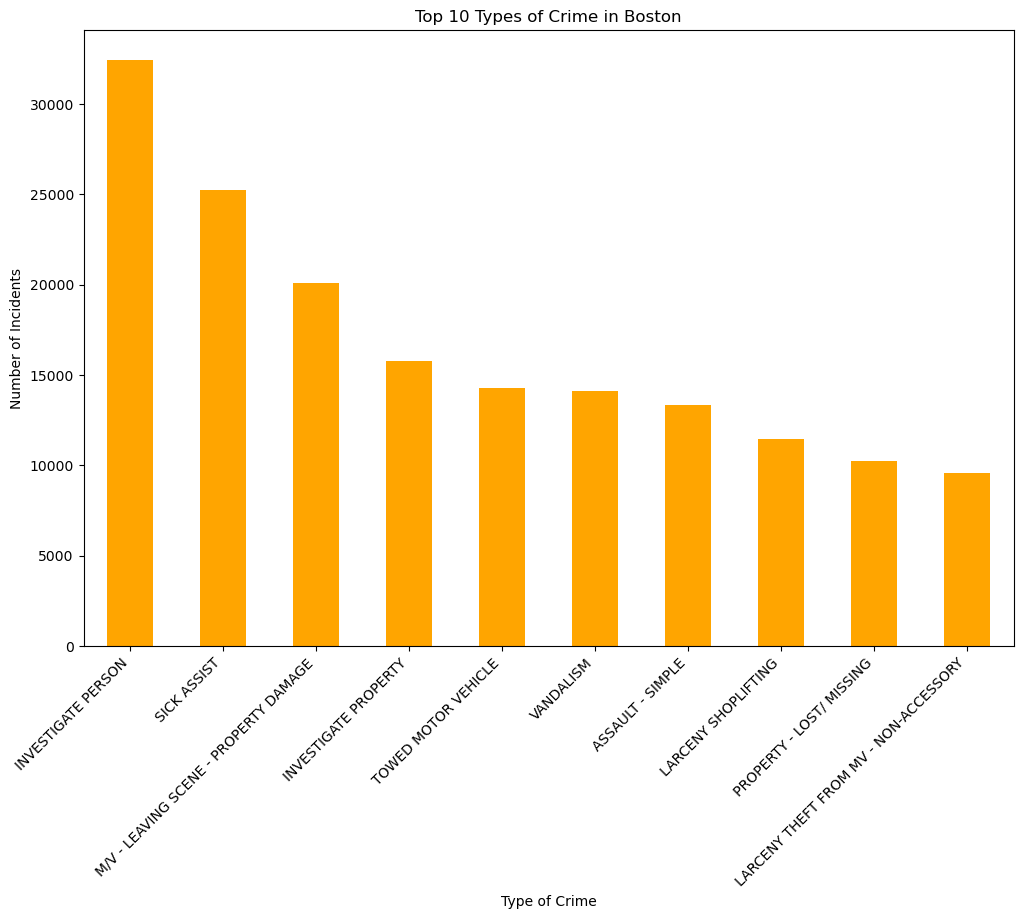

In [47]:
# find the 10 most type of crimes in boston
top_crimes = df_combined_boston['OFFENSE_DESCRIPTION'].value_counts().head(10)

#create bar chart
plt.figure(figsize=(12, 8))
top_crimes.plot(kind='bar', color='orange')
plt.title("Top 10 Types of Crime in Boston")
plt.xlabel("Type of Crime")
plt.ylabel("Number of Incidents")
plt.xticks(rotation=45, ha='right')
plt.show()

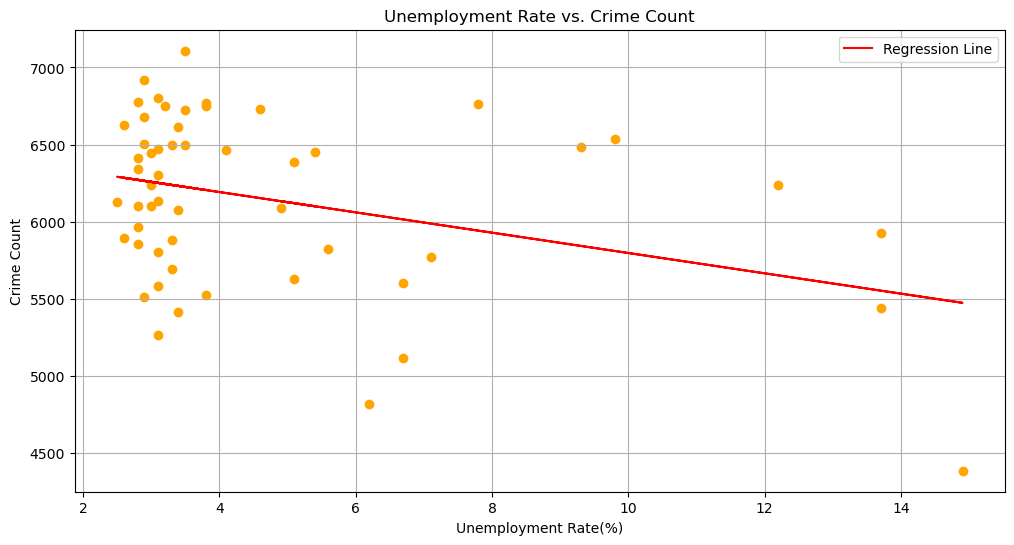

Regression Coefficient: -65.85200622971567
Regression Intercept: 6455.938451628787


In [48]:
# combine the data we gonna use
combined_data = pd.DataFrame({
    'Date': monthly_crime_counts_boston['Date'],
    'Unemployment Rate': unemployment_numbers_boston[:len(monthly_crime_counts_boston)],
    'Crime Count': monthly_crime_counts_boston['Crime Count']
})
combined_data = combined_data.dropna()

# extract the data use to do regression model
X = combined_data['Unemployment Rate'].values.reshape(-1, 1)
y = combined_data['Crime Count'].values

#create the linear regression model and plot
model = LinearRegression()
model.fit(X, y)
plt.figure(figsize=(12, 6))
plt.scatter(X, y, color='orange')
plt.plot(X, model.predict(X), color='red', label='Regression Line')
plt.xlabel('Unemployment Rate(%)')
plt.ylabel('Crime Count')
plt.title('Unemployment Rate vs. Crime Count')
plt.legend()
plt.grid()
plt.show()

#print the r value
print(f'Regression Coefficient: {model.coef_[0]}')
print(f'Regression Intercept: {model.intercept_}')